### Introduction

The main goal of this study is to analyze a dataset that contains crime reports in San Francisco between the years 2003 and 2018. This dataset has different information that can be taken into account for the project. The essential details are the location, date and resolution. Therefore, with the wide range of incident categories and geographic coverage, it offers insights into long-term crime trends and patterns. 

Our focus is on the crime category of "UNDER INFLUENCE OF ALCOHOL IN A PUBLIC PLACE" since we would like to know how has evolved during the years and its presence during the week days and times of the day. In our opinion, since the incident is related with alcohol, we think that it might be more common during Fridays and Saturdays and at night. However, we should analyze the data to confirm these facts. Moreover, the location of where these crimes took place is also relevant.

### Imports

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import datetime
import calplot
import folium
import json
from folium.plugins import HeatMap, HeatMapWithTime
import seaborn as sns

from random import random

### Data

In [13]:
data = pd.read_csv("Police_Department_Incident_Reports__Historical_2003_to_May_2018_20240130.csv")
data_og = data.copy()

focus = 'UNDER INFLUENCE OF ALCOHOL IN A PUBLIC PLACE'

### Time-series / Bar chart

In [14]:
crime_data = data[data['Descript'] == focus]
print(crime_data['DayOfWeek'].value_counts().sort_index())

DayOfWeek
Friday       1427
Monday       1185
Saturday     1841
Sunday       1889
Thursday     1145
Tuesday      1098
Wednesday    1175
Name: count, dtype: int64


/tmp/ipykernel_6264/3662108180.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  crime_data_two_years = crime_data[data['Date'].dt.year == current_year]
/tmp/ipykernel_6264/3662108180.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  crime_data_2003 = crime_data[data['Date'].dt.year == 2003]
/tmp/ipykernel_6264/3662108180.py:37: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  crime_data['hour'] = pd.to_datetime(crime_data['Time']).dt.hour
/tmp/ipykernel_6264/3662108180.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_data['hour'] = p

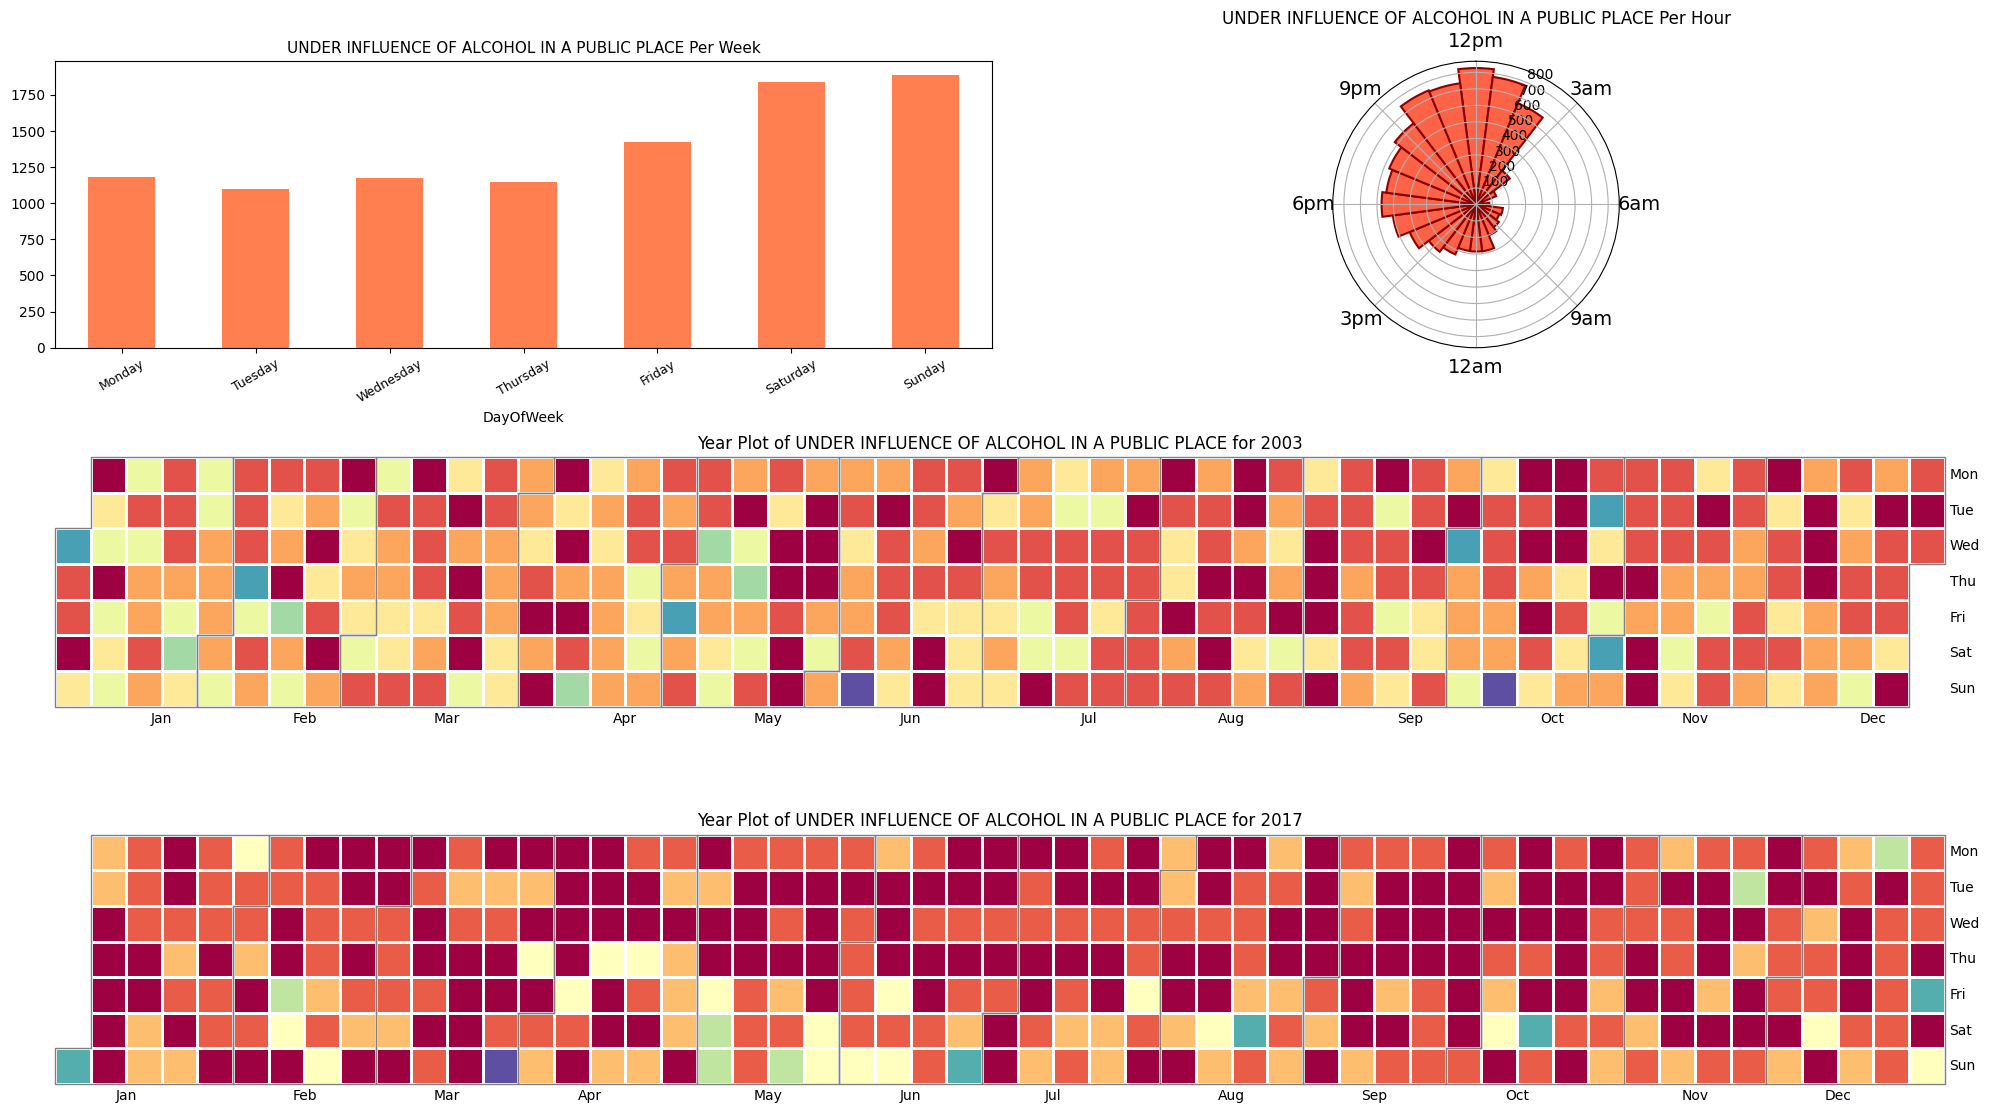

In [15]:
data = data_og.copy()
data['Date'] = pd.to_datetime(data['Date'])
crime_data = data[data['Descript'] == focus]

# Filter data to include only the past two years
current_year = 2017
crime_data_two_years = crime_data[data['Date'].dt.year == current_year]

# Compute daily counts for the past two years
daily_counts_two_years = crime_data_two_years.groupby(pd.Grouper(key='Date', freq='D')).size()

# Filter data for 2003
crime_data_2003 = crime_data[data['Date'].dt.year == 2003]
daily_counts_2003 = crime_data_2003.groupby(pd.Grouper(key='Date', freq='D')).size()

# Set the size of the entire figure
plt.figure(figsize=(20, 15))

# Create a gridspec object
gs = gridspec.GridSpec(4, 2)

# Create subplots
axes = []
axes.append(plt.subplot(gs[0, 0]))  # Weekday bar plot
axes.append(plt.subplot(gs[0, 1], projection='polar'))  # Hours polar plot
axes.append(plt.subplot(gs[1, :]))  # Year plot for 2018 (replacing calendar map)
axes.append(plt.subplot(gs[2, :]))  # Year plot for 2003

# Weekday bar plot
crimes_per_weekday = crime_data['DayOfWeek'].value_counts().sort_index()
crimes_per_weekday = crimes_per_weekday.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
crimes_per_weekday.plot(kind='bar', ax=axes[0], color='coral')
axes[0].set_title(f'{focus} Per Week', fontsize=11)
axes[0].tick_params(axis='x', rotation=30, labelsize=9)

# Hours polar plot
crime_data['hour'] = pd.to_datetime(crime_data['Time']).dt.hour
crime_counts_by_hour = crime_data['hour'].value_counts().sort_index()
ax = axes[1]
ax.bar(np.array(crime_counts_by_hour.index) * 2 * 3.14159 / 24, 
       np.array(crime_counts_by_hour.values), 
       width=2 * 3.14159 / 24,
       color='tomato',
       edgecolor='darkred', 
       linewidth=1.5)
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_xticklabels(['12pm', '3am', '6am', '9am', '12am', '3pm', '6pm', '9pm'], fontsize=14)
ax.set_title(f'{focus} Per Hour')

# Year plot for 2003
calplot.yearplot(daily_counts_2003, year=2003, ax=axes[2], cmap='Spectral')
axes[2].set_title(f'Year Plot of {focus} for 2003')

# Year plot for 2018
calplot.yearplot(daily_counts_two_years, year=current_year, ax=axes[3], cmap='Spectral')
axes[3].set_title(f'Year Plot of {focus} for {current_year}')


plt.tight_layout()
plt.show()


In order to asses the prevalence of the specific chosen crime, we created a subplot of three different analyses. First of all, we wanted to know the presence of being in a public place under the influence of alcohol along the week. Given that social gatherings and festivities are more prevalent on weekends, we anticipated heightened alcohol consumption during these periods. Observing the bar plot, indeed validates this assumption revealing a higher occurrence of the crime on Saturdays and Sundays.

Another crucial aspect to evaluate was the timing of these offenses, therefore we generated a polar plot. It can be observed that the focal crime usually occurs during nighttime hours (between 9 pm and 12 pm) and extends into the early morning (between 12 pm and 3 am). These findings align with the notion that individuals tend to engage in this offense when they are out partying, usually at night.

Finally, a comparative assessment of the crime presence between the initial and final years of the dataset was done through the calendar plots created with *calplot*. Taking into account the colorbar that denotes varying degrees of crime prevalence, blue and purple cells indicate lower occurrences, while darker reds and oranges mean heightened incidences. Therefore, it becomes evident that the incidence of public intoxication has escalated over the course of the dataset, particularly evident in the year 2017 where an increased of arker red-orange cells is observed.

In reflection, the rise in this specific crime highlights the importance of taking proactive steps to address it. We could think of various factors that can drive to this increase, like easier access to alcohol, changes in how society sees certain behaviors or differences in how laws are enforced and monitored. It is important for authorities to investigate the root causes in order to reduce the number of offenses and create safer environments.

### Map

By visualizing the frequency of incidents for the specific crime over each year, we observe a notable peak occurring in 2013. This suggests that there was a significant surge in the number of occurrences of the focus crime during that particular year. This observation prompts further investigation into the factors that might have contributed to this distinct increase in criminal activity.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Extract year from the 'Date' column
crime_data['Year'] = crime_data['Date'].dt.year

# Group the data by year and calculate the total number of incidents for each year
incident_count_per_year = crime_data.groupby('Year').size()

# Plot the data as a line plot
plt.figure(figsize=(10, 6))
incident_count_per_year.plot(kind='line', marker='o', color='b')

# Add labels and title
plt.title('Total Number of Incidents by Year')
plt.xlabel('Year')
plt.ylabel('Total Number of Incidents')

# Show plot
plt.grid(True)
plt.show()


To continue our analysis we will examine whether certain areas exhibit a higher prevalence of this particular crime compared to others. This entails investigating spatial distribution to identify regions where the incidence of the crime is more frequent or concentrated. By doing so, we aim to gain insights into geographic patterns and potential hotspots associated with the selected crime type.

In [132]:
from urllib.request import urlopen
import json
import plotly.express as px

with urlopen('https://raw.githubusercontent.com/suneman/socialdata2022/main/files/sfpd.geojson') as response:
    sfmap = json.load(response)

crime_data['Date'] = pd.to_datetime(crime_data['Date'])

year_2013_df = crime_data[crime_data['Year'] == 2013]
#print(f'2013: {len(year_2013_df)}')
data_per_district_2013 = year_2013_df.groupby('PdDistrict').size().reset_index(name='IncidntNum')
#print(data_per_district_2013)

# To create the plot, remember that your range of data-values is different from before, so you'll have to change the plotly command a bit.
fig = px.choropleth_mapbox(data_per_district_2013, geojson=sfmap, locations='PdDistrict', color='IncidntNum',
                           color_continuous_scale="RdYlGn_R",
                           range_color=(0, 320),
                           mapbox_style="carto-positron",
                           zoom=10, center = {"lat": 37.773972, "lon": -122.431297},
                           opacity=0.7,
                           labels={'IncidntNum':'Num Vehicle Theft'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

It is evident that the 'SOUTHERN DISTRICT' recorded the highest number of incidents in 2013, significantly surpassing the count in other districts. Moreover, it observed at least twice as many cases compared to other districts. This cannot be attributed to the size of the district, as a visual inspection of the map confirms that it is one of the smallest districts, so there must be another explanation.

In [130]:
import folium

lat= 37.773972
lon= -122.431297
map_sfra_2013 = folium.Map([lat, lon], zoom_start=10)

# Filter data for year 2013
crime_data['Year'] = crime_data['Date'].dt.year
year_2013_df = crime_data[crime_data['Year'] == 2013]
data_per_district_2013 = year_2013_df.groupby('PdDistrict').size().reset_index(name='IncidntNum')


folium.Choropleth(
    geo_data=sfmap,
    name="choropleth",
    data=data_per_district_2013,
    columns=["PdDistrict", "IncidntNum"],
    key_on="feature.properties.DISTRICT",
    fill_color="RdYlGn_r",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="2013 Incidents",
).add_to(map_sfra_2013)


crime_data_2013_southern = year_2013_df[year_2013_df['PdDistrict'] == 'SOUTHERN']
for index, row in crime_data_2013_southern.iterrows():
    folium.Marker([row['Y'], row['X']]).add_to(map_sfra_2013)


map_sfra_2013

From this plot, it appears that the Southern district accounts for the majority of cases, encompassing the entire SoMa (South of Market) district. SoMa is renowned in San Francisco for its dynamic cultural landscape and diverse urban environment. Historically, SoMa has been a hub for industrial activities, art studios, and LGBTQ+ communities, contributing to its vibrant and eclectic character.

Several factors contribute to why the SoMa district might have a higher incidence of 'Under Influence of Alcohol in a Public Place' cases. SoMa is home to numerous bars, nightclubs, and entertainment venues, making it a popular destination for nightlife activities. The concentration of establishments serving alcohol increases the likelihood of incidents related to public intoxication and disorderly conduct.